<a href="https://colab.research.google.com/github/YasinnSoylu/lazypredict-regression-and-classification/blob/main/lazypredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install lazypredict

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import datasets

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor


# classification


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


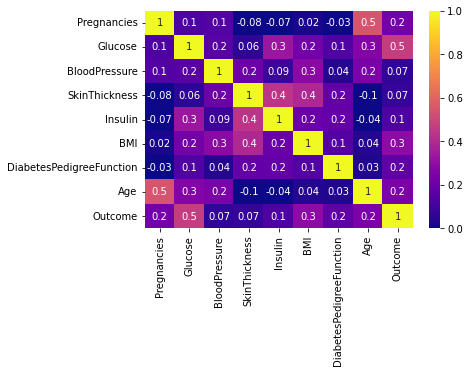

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=0, vmax=1, cmap='plasma')


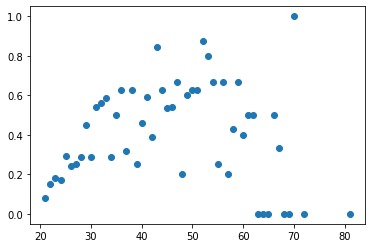

In [ ]:
plt.scatter(df.sort_values('Age')['Age'].unique(), df.groupby('Age').mean()['Outcome'])
plt.show()

In [ ]:
y = df['Outcome'].values
X = df.drop(['Outcome'],axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)


In [ ]:
models,predictions=clf.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:02<00:00, 13.20it/s]


In [ ]:
models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.78,0.76,0.76,0.78,0.02
GaussianNB,0.77,0.75,0.75,0.77,0.02
RidgeClassifierCV,0.77,0.75,0.75,0.77,0.03
XGBClassifier,0.76,0.74,0.74,0.76,0.20
DecisionTreeClassifier,0.75,0.74,0.74,0.75,0.02
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.08
RidgeClassifier,0.76,0.74,0.74,0.76,0.02
LinearSVC,0.75,0.74,0.74,0.75,0.07
LogisticRegression,0.75,0.74,0.74,0.75,0.02


In [ ]:
models.sort_values(by=['Accuracy'],ascending=False)


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.78,0.76,0.76,0.78,0.02
GaussianNB,0.77,0.75,0.75,0.77,0.02
RidgeClassifierCV,0.77,0.75,0.75,0.77,0.03
XGBClassifier,0.76,0.74,0.74,0.76,0.20
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.08
RidgeClassifier,0.76,0.74,0.74,0.76,0.02
LinearSVC,0.75,0.74,0.74,0.75,0.07
LogisticRegression,0.75,0.74,0.74,0.75,0.02
CalibratedClassifierCV,0.75,0.73,0.73,0.75,0.20


# Regression

In [ ]:
df = pd.read_csv('insurance.csv')


In [ ]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2 ,  random_state = 0)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:36<00:00,  1.14it/s]

[19:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
models


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.90,0.90,4005.42,0.13
GradientBoostingRegressor,0.89,0.90,4049.21,0.16
RandomForestRegressor,0.88,0.88,4376.61,0.43
ExtraTreesRegressor,0.88,0.88,4399.05,0.37
HistGradientBoostingRegressor,0.87,0.88,4427.53,0.40
LGBMRegressor,0.87,0.88,4443.61,0.08
BaggingRegressor,0.87,0.87,4477.14,0.06
AdaBoostRegressor,0.83,0.83,5170.20,0.06
KNeighborsRegressor,0.80,0.81,5521.81,0.04


In [ ]:
models.sort_values(by=['RMSE'],ascending=True)


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.90,0.90,4005.42,0.13
GradientBoostingRegressor,0.89,0.90,4049.21,0.16
RandomForestRegressor,0.88,0.88,4376.61,0.43
ExtraTreesRegressor,0.88,0.88,4399.05,0.37
HistGradientBoostingRegressor,0.87,0.88,4427.53,0.40
LGBMRegressor,0.87,0.88,4443.61,0.08
BaggingRegressor,0.87,0.87,4477.14,0.06
AdaBoostRegressor,0.83,0.83,5170.20,0.06
KNeighborsRegressor,0.80,0.81,5521.81,0.04
